# Perceptron Trick and Perceptron Algorithm
- step function vs sigmoid function
- softmax
- maximum likelihood
- maximizing maximum likelihood
- cross-entropy

In [1]:
import numpy as np
import pandas as pd

In [168]:
-np.log(0.8) - np.log(.7) - np.log(.9)


0.6851790109107685

In [157]:
from matplotlib import pyplot as plt


def step_function(t):
    if t >= 0:
        return 1
    return 0


def prediction(X, W, b):
    return step_function((np.matmul(X, W) + b)[0])


# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptron_step(X, y, W, b, learning_rate=0.01):
    for idx, y_i in enumerate(y):
        step = prediction(X[idx], W, b)

        if y_i - step == 1:
            W[0] += X[idx][0] * learning_rate
            W[1] += X[idx][1] * learning_rate
            b += learning_rate
        elif y_i - step == -1:
            W[0] -= X[idx][0] * learning_rate
            W[1] -= X[idx][1] * learning_rate
            b -= learning_rate
    return W, b


# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def train_perceptron_algorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [158]:
perceptron = pd.read_csv('datasets/perceptron_data.csv', names=['x1', 'x2', 'y'])
X, y = perceptron.loc[:, ['x1', 'x2']].values, perceptron['y'].values
boundary_lines = train_perceptron_algorithm(X, y)

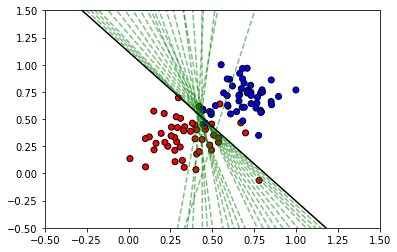

In [163]:
def abline(slope, intercept,i):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    if i == len(boundary_lines) - 1:
        plt.plot(x_vals, y_vals,color='black')
    else:
        plt.plot(x_vals, y_vals, '--',color='green', alpha=.5)

slope = [i[0][0] for i in boundary_lines]
intercepts = [i[1][0] for i in boundary_lines]
plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='black',cmap='bwr', s=36)
for i in range(len(slope)):
    abline(slope[i],intercepts[i],i)

# Softmax


In [167]:
# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    vals = [np.e**x for x in range(len(np.array(L)))]
    return vals / np.sum(vals)


softmax([5, 6, 7])

array([0.09003057, 0.24472847, 0.66524096])

# One-Hot-Encoding w/ Softmax

# Cross-Entropy


In [179]:
Y = [1, 0, 1, 1]
P = [.4, .6, .1, .5]

def cross_entropy(Y, P):
    vals = []
    for y, p in zip(Y, P):
        vals.append(y * np.log(p) + (1 - y) * np.log(1 - p))
    return -sum(vals)


cross_entropy(Y, P)

1 0.4
0 0.6
1 0.1
1 0.5
4.828313737302301
